<a href="https://colab.research.google.com/github/AmirJlr/Molecular-Property-Prediction/blob/master/MPP_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from IPython.display import Image # show image in cells

# install rdkit
! pip install rdkit
! pip install deepchem
! pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.6 MB/s eta 0:00:00


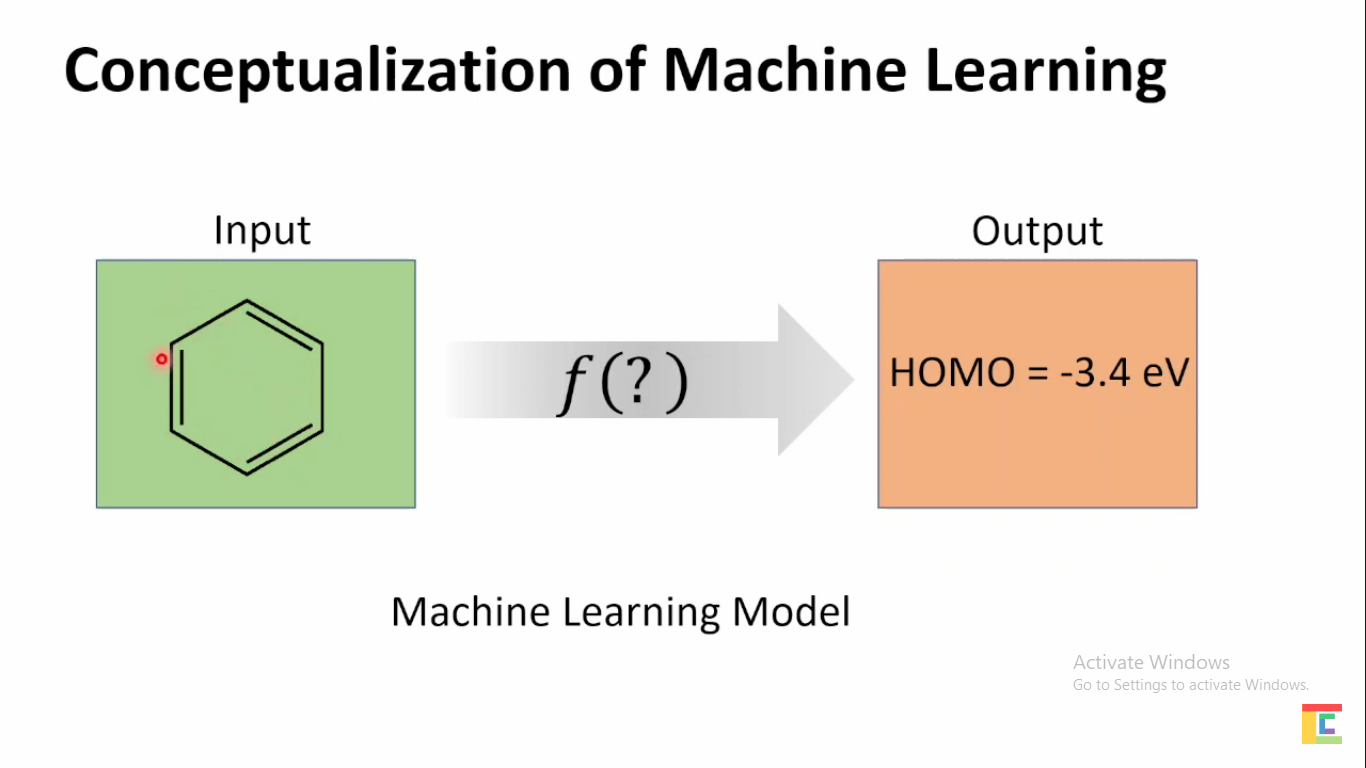

In [33]:
Image(filename='figs/01-concept.png', width=700)

# Contents :
- ## Datasets
- ## Molecular Representation
- ## Classical Ml Models
- ## Artificial Neural Networks
- ## Graph Neural Networks
- ## Using Pre-Trained Models
- ## HyperParameter Tuning

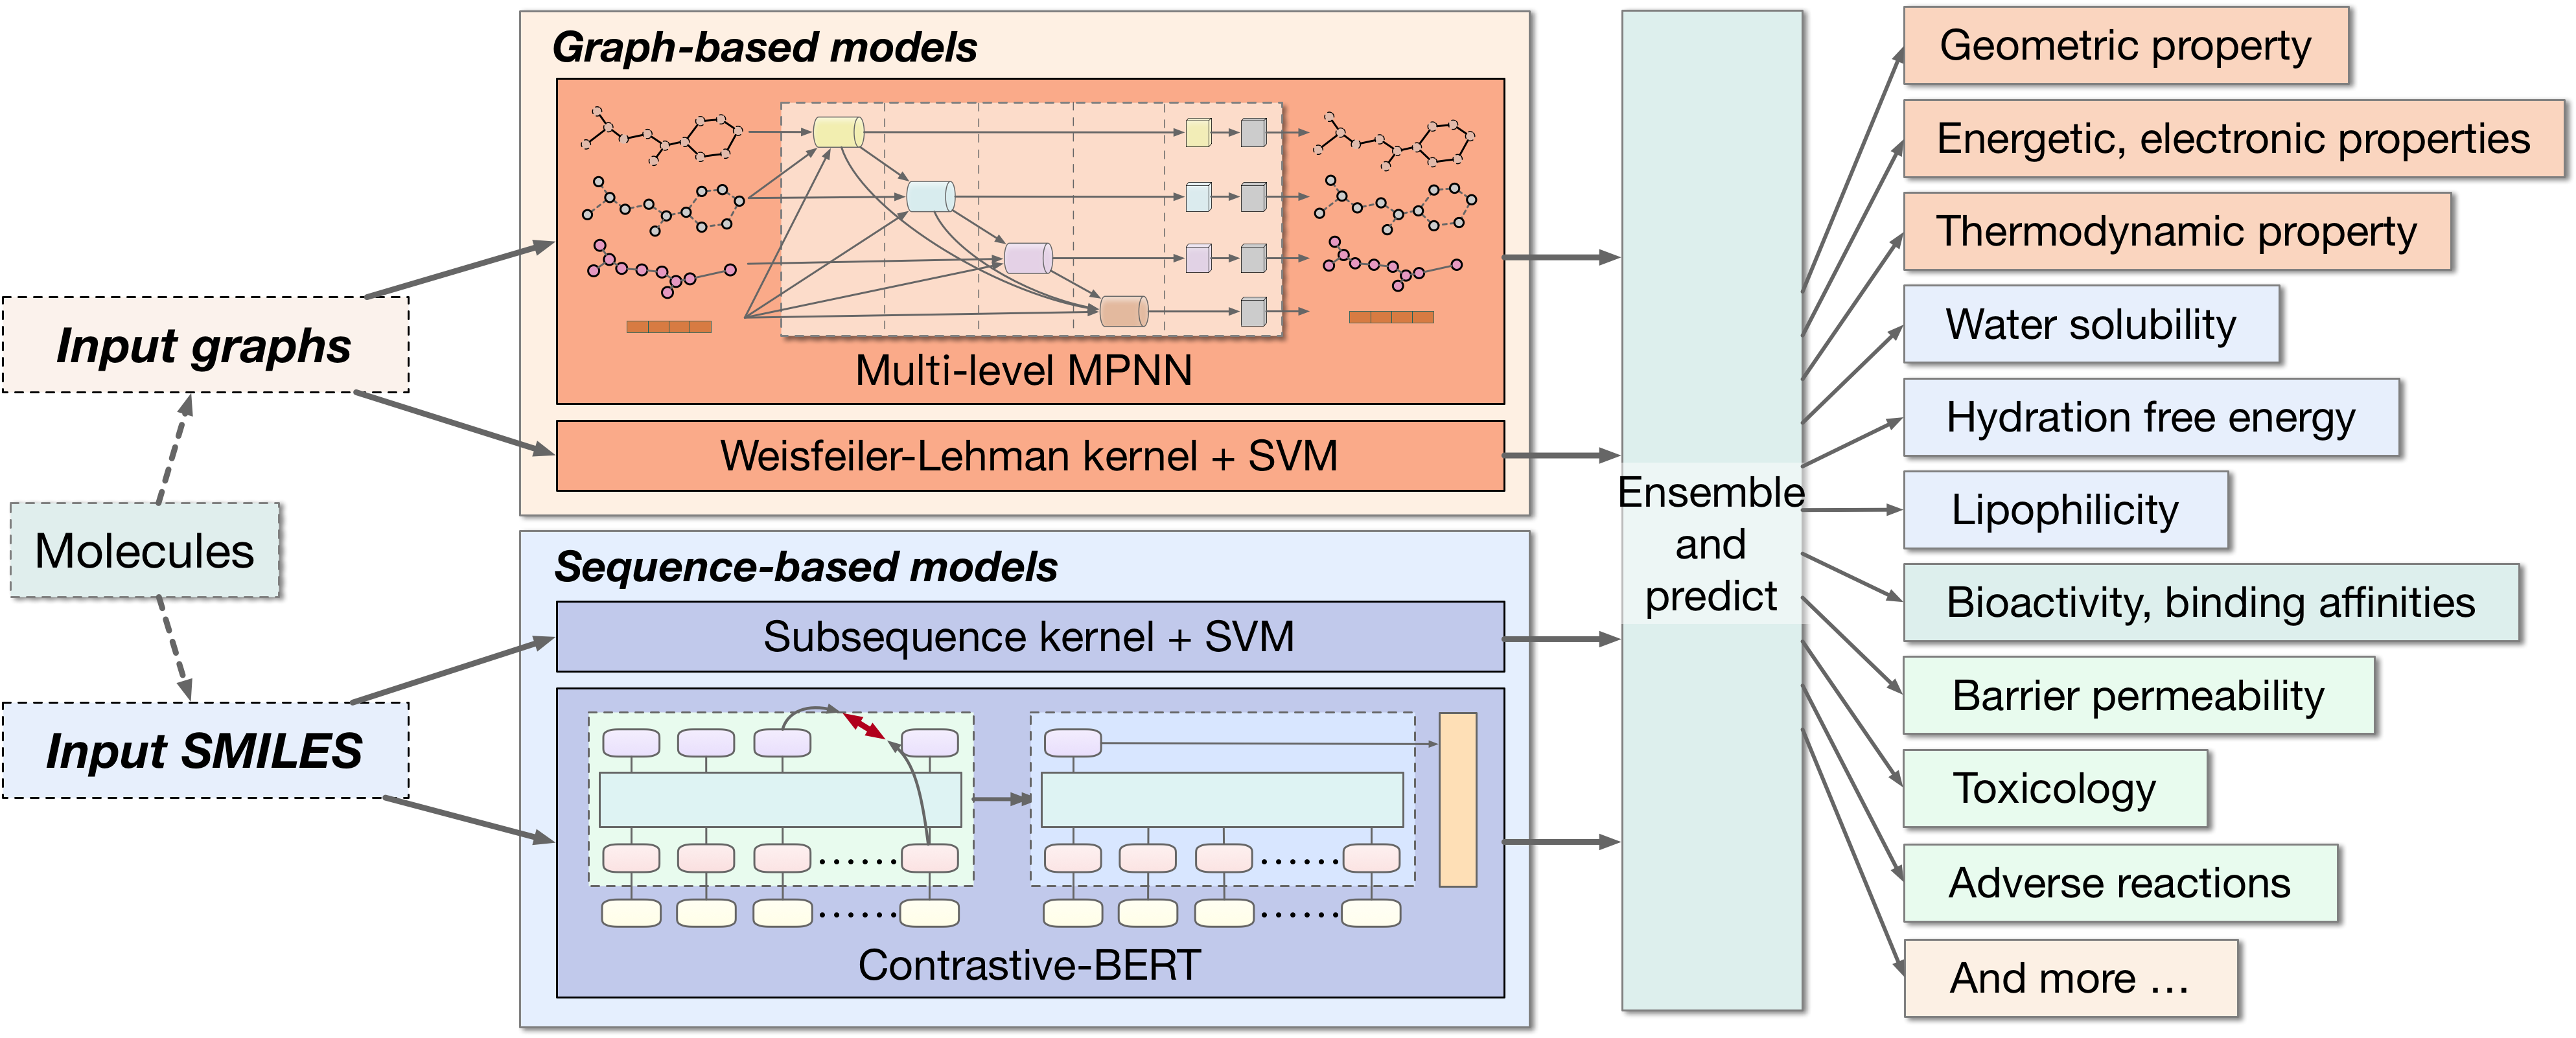

In [34]:
Image(filename='figs/00-overview.png', width=700)

## Datasets :


In [15]:
# import that pandas library
import pandas as pd

# load the dataframe as CSV from URL.
# If you upload the file to Colab, replace the URL with the file name
df = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv")

# create the dataset with only smiles and gap and 10% dataset
dataset = df[["smiles","gap"]].sample(frac=0.1)
dataset.head()

,smiles,gap
79763,OC1C2C3CC4C(C23)C14,0.3071
50817,N=C(NC=O)C1CCO1,0.2218
32027,CNc1cncc(=O)o1,0.1527
102110,COC(C=O)C1CC1O,0.2114
50747,C1CN(C(=O)OC1)C=O,0.2366


In [16]:
# import the Chem library for converting SMILES into RDKit molecules
from rdkit import Chem

# We will use MolToGridImage to visualize the 2D structure
from rdkit.Chem.Draw import MolsToGridImage

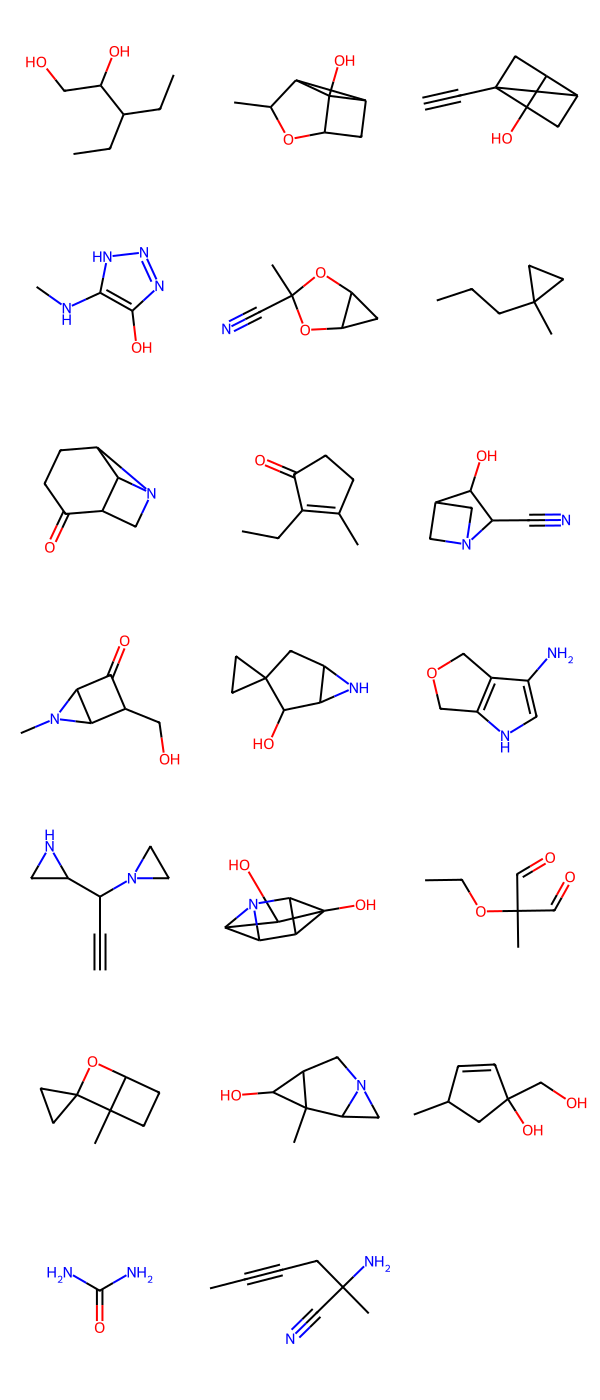

In [17]:
# randomly select 20 entries from the dataframe
sample_df = dataset.sample(n=20)

# create a list of smiles
smiles_list = sample_df["smiles"].tolist()

# create the RDKit molecule objects with list comprehension
MolsToGridImage([Chem.MolFromSmiles(smile) for smile in smiles_list ])

## Molecular Representation

We will use **CircularFingerprint(Morgan fingerprint)** and **RDKitDescriptors** featurizer from deepchem.

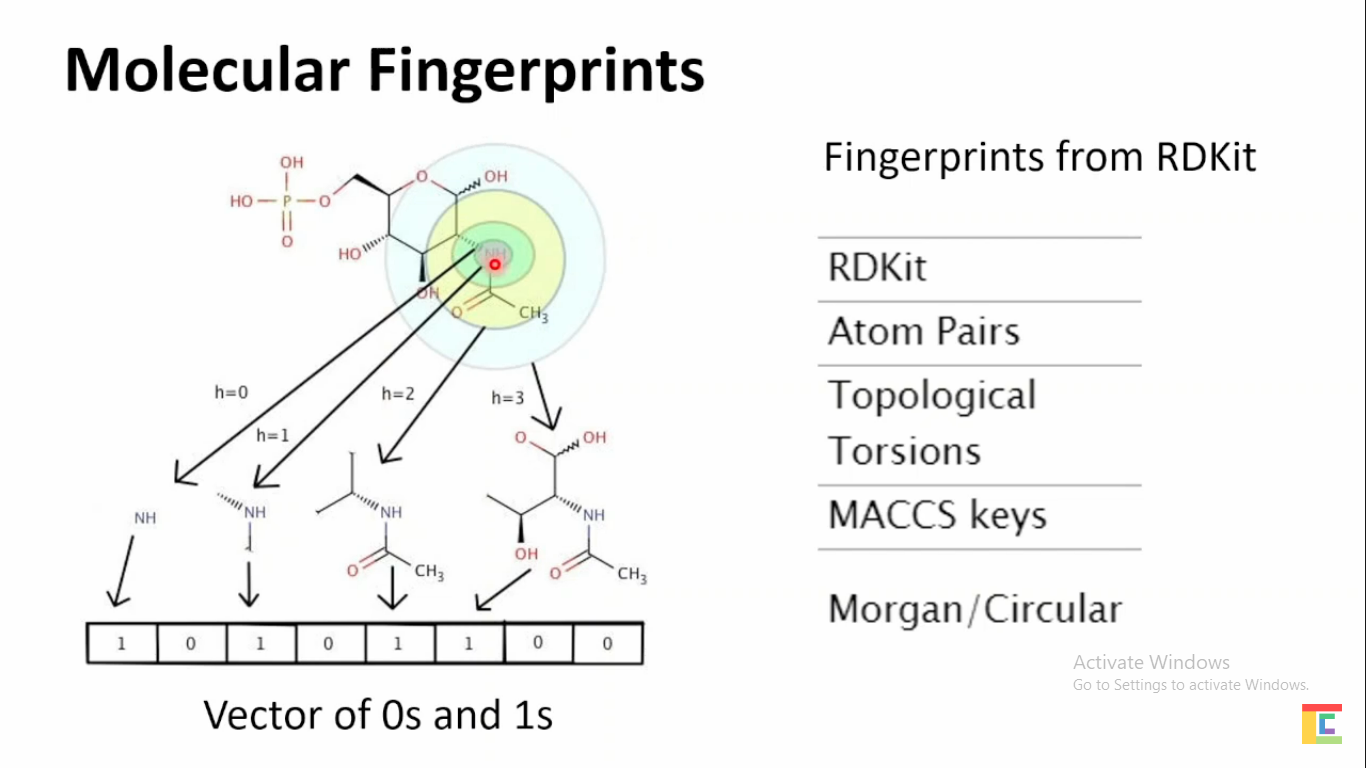

In [35]:
Image(filename='figs/04-fingerprints.png', width=700)

-  CircularFingerprints

In [13]:
# import depechem and rdkit
import deepchem as dc
from rdkit import Chem

# create the featurizer object
# we will set the radius=2, size=100 as before
featurizer = dc.feat.CircularFingerprint(size=100, radius=2)

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [14]:
featurizer.featurize("CC")

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [18]:
### We can now apply the featurizer to the dataset :

dataset["fp"] = dataset["smiles"].apply(featurizer.featurize)

# looking at the top 5 entries
dataset.head()

,smiles,gap,fp
79763,OC1C2C3CC4C(C23)C14,0.3071,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."
50817,N=C(NC=O)C1CCO1,0.2218,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
32027,CNc1cncc(=O)o1,0.1527,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
102110,COC(C=O)C1CC1O,0.2114,"[[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,..."
50747,C1CN(C(=O)OC1)C=O,0.2366,"[[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."


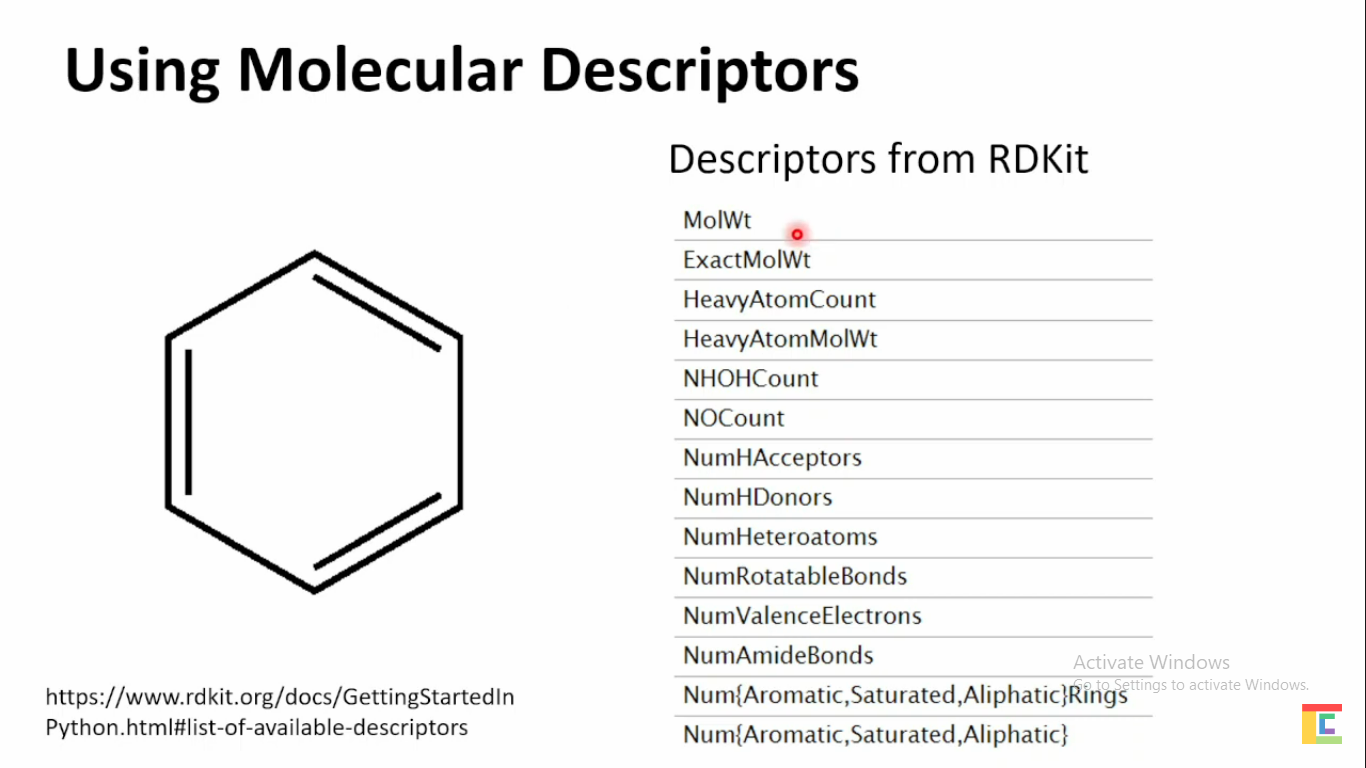

In [36]:
Image(filename='figs/03-descriptors.png', width=700)

- RDKitDescriptors

This gives a list of chemical descriptors like molecular weight, number of valence electrons, maximum and minimum partial charge, etc using RDKit. By default, the length of the list is 208.

In [19]:
# create the featurizer
descriptor = dc.feat.RDKitDescriptors()

# apply it on ethane
descriptor.featurize("CC")

array([[ 1.        ,  0.93173762, -1.06826238,  1.1441    , -0.8559    ,
         3.503     ,  1.503     , 13.011     , 11.011     ,  1.        ,
         0.        ,  2.        ,  2.        ,  2.        ,  1.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 13.8474744 ,  0.        ,  0.        , 30.04695019,
         1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
         2.        , 24.022     ,  1.        ,  2.        ,  0.        ,
         0.        , 15.10419314,  2.        ,  0.06826238,  2.        ,
        -0.06826238,  2.        ,  0.06826238,  2.        , -0.06826238,
         1.0262    , 11.348     , 30.07      ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

## Classical Ml Models

In [20]:
dataset.head(2)

,smiles,gap,fp
79763,OC1C2C3CC4C(C23)C14,0.3071,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."
50817,N=C(NC=O)C1CCO1,0.2218,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [21]:
# the fp is an multi-dimensional array but we want to list for training
dataset["fp"] = dataset["fp"].apply(lambda x: list(x[0]))


In [23]:
# import the function to split into train-valid-test
from fast_ml.model_development import train_valid_test_split

# we will split the dataset as train-valid-test = 0.8:0.1:0.1
X_train, y_train, X_valid, y_valid, \
X_test, y_test = train_valid_test_split(dataset[["fp","gap"]], target = "gap", train_size=0.8,
                                        valid_size=0.1, test_size=0.1)


- Linear regression model :

In [24]:
# import the model
from sklearn.linear_model import LinearRegression

#create the model object
lr = LinearRegression()

# fit the model with x=fp and y=gap
model = lr.fit(X_train["fp"].values.tolist(),y_train.values.tolist())

To check the accuracy of the linear fit, we can use the valid dataset. The score function computes the R2 value. R2 close to 1 is better.

In [25]:
model.score(X_valid["fp"].values.tolist(),y_valid.values.tolist())

0.6288499763029314

- Support vector machine regression (SVR) model

In [26]:
# import the model class
from sklearn.svm import SVR

#create the model object
svr = SVR()

# fit the model with x=fp and y=gap
model = svr.fit(X_train["fp"].values.tolist(),y_train.values.tolist())

In [27]:
model.score(X_valid["fp"].values.tolist(),y_valid.values.tolist())

0.24333628284750985

The R2 is low with SVR. We can change the model parameters to see if we get any improvement.

We will change the kernel to linear and see if that helps : (Default is rbf)

In [28]:
svr = SVR(kernel="linear")
model = svr.fit(X_train["fp"].values.tolist(),y_train.values.tolist())
model.score(X_valid["fp"].values.tolist(),y_valid.values.tolist())

0.3967699023750516